# Quick Webb Photometry Sample Notebook #

This notebooks relies on the quickwebb set of routines to do a quick and dirty photometry analysis.

The QuickWebb module has the following functions.
- webbcrawl: Get info about files in a directory
- photnow: Do quick and dirty aperture photometry

This notebook also makes use of the jdaviz Imviz tool for designing the aperture for the photometry.

In [35]:
import quickwebb as qw
%matplotlib inline

## Step 1: Crawl through a directory to get the data files

In [36]:
files = qw.webbcrawl('/Users/smullally/jwst/simulated_data/ngc346-mosaic/')

  INSTRUME MODULE  DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM
0   NIRCAM      A  NRCALONG  F444W  CLEAR  536.8385     FULL  UNKNOWN      34
1   NIRCAM      A     NRCA1  F115W  CLEAR  536.8385     FULL  UNKNOWN      34


In [37]:
#Notice that files also contains the path for easy access
print(files)

  INSTRUME MODULE  DETECTOR FILTER  PUPIL  EFFINTTM SUBARRAY TARGNAME PROGRAM  \
0   NIRCAM      A  NRCALONG  F444W  CLEAR  536.8385     FULL  UNKNOWN      34   
1   NIRCAM      A     NRCA1  F115W  CLEAR  536.8385     FULL  UNKNOWN      34   

                                                                                              PATH  
0  /Users/smullally/jwst/simulated_data/ngc346-mosaic/Pipeline_Level3/ngc346-f444w-mosaic_i2d.fits  
1  /Users/smullally/jwst/simulated_data/ngc346-mosaic/Pipeline_Level3/ngc346-f115w-mosaic_i2d.fits  


In [39]:
from jdaviz import Imviz
imviz = Imviz()
imviz.app


Application(config='imviz', events=['call_viewer_method', 'close_snackbar_message', 'data_item_selected', 'des…

In [40]:
imviz.load_data(files['PATH'][0])

In [43]:
regions = imviz.get_interactive_regions()
regions

{'Subset 1': <CirclePixelRegion(center=PixCoord(x=2411.70751953125, y=2543.447265625), radius=50.7335205078125)>,
 'Subset 3': <CirclePixelRegion(center=PixCoord(x=3117.26708984375, y=2264.205078125), radius=13.36181640625)>,
 'Subset 4': <CirclePixelRegion(center=PixCoord(x=2878.089599609375, y=2143.947998046875), radius=8.96337890625)>,
 'Subset 6': <CirclePixelRegion(center=PixCoord(x=2689.110107421875, y=2449.923095703125), radius=7.746337890625)>,
 'Subset 7': <CirclePixelRegion(center=PixCoord(x=2159.2275390625, y=2738.528564453125), radius=18.42626953125)>}

Subset 1


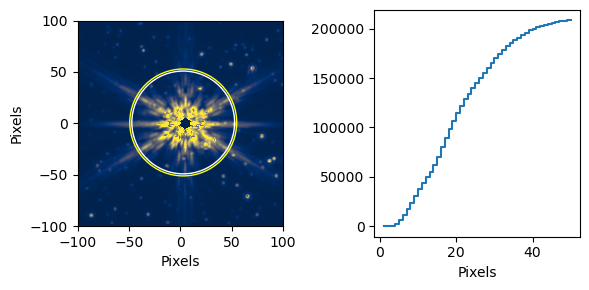

Aper. Photometry: 208429.947 +/-   342.041
Subset 3


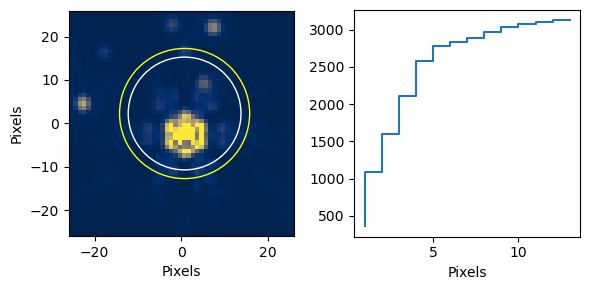

Aper. Photometry:  3124.439 +/-     6.866
Subset 4


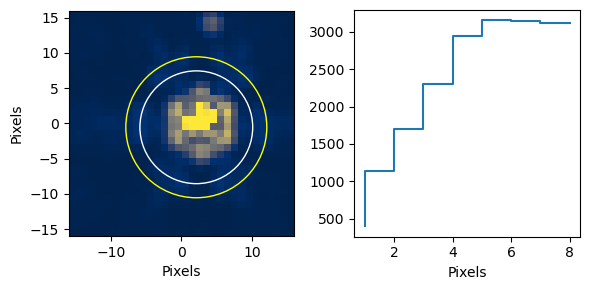

Aper. Photometry:  3120.584 +/-    23.349
Subset 6


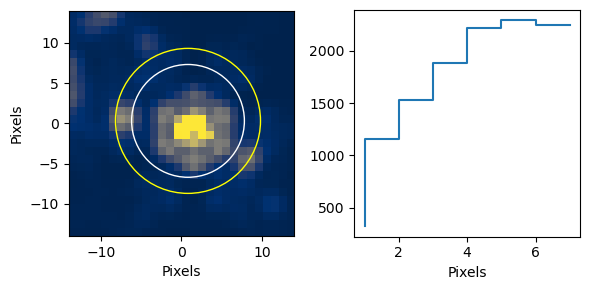

Aper. Photometry:  2242.846 +/-    13.521
Subset 7


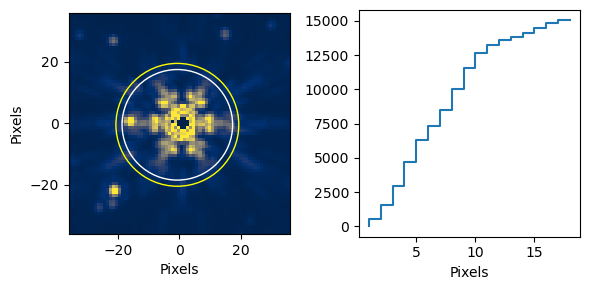

Aper. Photometry: 15042.622 +/-    66.823


In [44]:
regions['Subset 1'].center.xy
for subset in regions.keys():
    print(subset)
    photometry, cutout, cen = qw.photnow(files['PATH'][0], regions[subset].center.xy, radii_pixels=int(regions[subset].radius))

In [45]:
photometry

(array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18.]),
 array([-1.23143912e+01,  5.56966593e+02,  1.56683482e+03,  2.97139880e+03,
         4.71797723e+03,  6.28222306e+03,  7.33379289e+03,  8.50677321e+03,
         1.00113519e+04,  1.15602583e+04,  1.26342928e+04,  1.32370647e+04,
         1.35922965e+04,  1.38362464e+04,  1.40941175e+04,  1.44699534e+04,
         1.48403134e+04,  1.50426223e+04]),
 array([[-0.9877574 , -0.9983775 , -0.98156667, ..., -0.9269792 ,
         -0.80177754, -0.73651725],
        [-0.86694425, -0.9085784 , -0.90916485, ..., -0.756367  ,
         -0.7750472 , -0.78785723],
        [-0.9447264 , -0.9435437 , -0.8601232 , ..., -0.59628236,
         -0.770366  , -0.8796638 ],
        ...,
        [-0.8482479 , -0.9395831 , -0.9210145 , ..., -0.706607  ,
         -0.76159656, -0.7991052 ],
        [-0.99169457, -0.9247107 , -0.7755412 , ..., -0.7399279 ,
         -0.73199946, -0.8452589 ],
        [-0.96449965,